<a href="https://colab.research.google.com/github/sanjinarajbhandari/Workshop/blob/main/Worksheet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Excersice 1

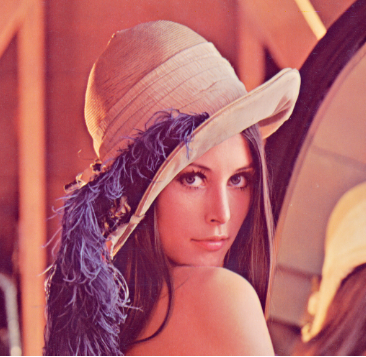

In [ ]:
image= Image.open('/content/drive/MyDrive/AI_Sem6/lenna_image.png')
image

(-0.5, 99.5, 99.5, -0.5)

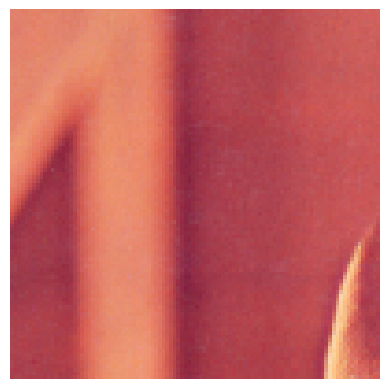

In [ ]:
image_array= np.array(image)
top_left_corner = image_array[:100, :100]
plt.imshow(top_left_corner)
plt.axis("off")

Text(0.5, 1.0, 'Red')

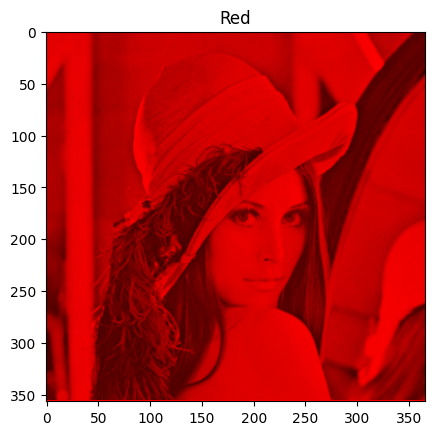

In [ ]:
red= image_array.copy()
red[:,:,1]=0
red[:,:,2]=0
plt.imshow(red)
plt.title("Red")

Text(0.5, 1.0, 'Green')

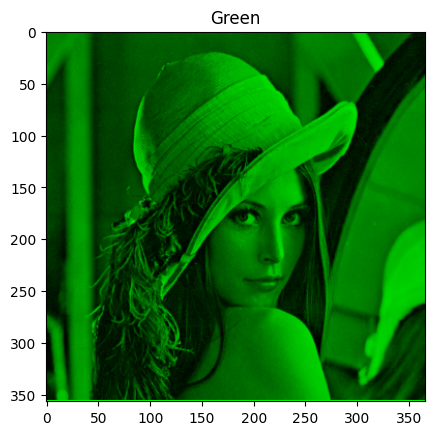

In [ ]:
green= image_array.copy()
green[:,:,0]=0
green[:,:,2]=0
plt.imshow(green)
plt.title("Green")

Text(0.5, 1.0, 'Blue')

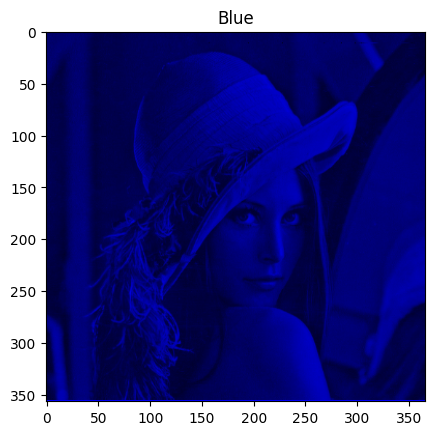

In [ ]:
blue= image_array.copy()
blue[:,:,0]=0
blue[:,:,1]=0
plt.imshow(blue)
plt.title("Blue")

Text(0.5, 1.0, 'modified')

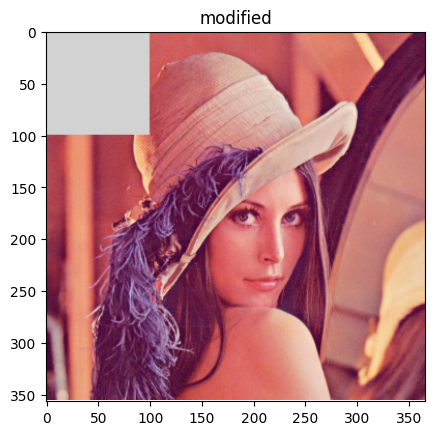

In [ ]:
modified= image_array.copy()
modified[:100,:100,1]=210
modified[:100,:100,0]=210
modified[:100,:100,2]=210
plt.imshow(modified)
plt.title("modified")

# Excercise 2


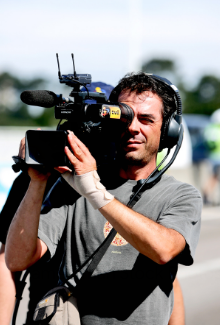

In [ ]:
image_2= Image.open("/content/drive/MyDrive/AI_Sem6/camera_man.jpg")
image_2

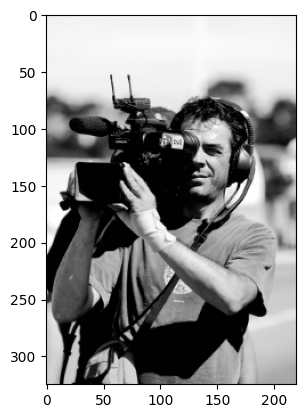

In [ ]:
image_gray= image_2.convert('L')
plt.imshow(image_gray, cmap='gray')

In [ ]:
image_gray_array= np.array(image_gray)
height, width = image_gray_array.shape[:2]
height, width

(325, 220)

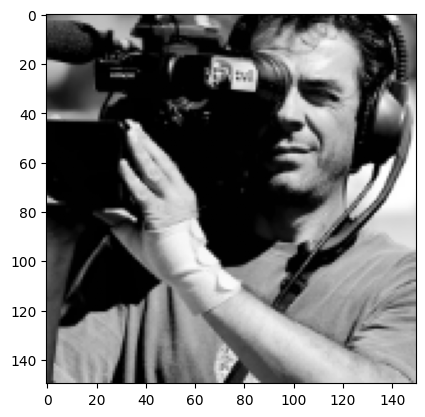

In [ ]:
start_y = (height - 150) // 2
end_y = start_y + 150
start_x = (width - 150) // 2
end_x = start_x + 150
middle_section = image_gray_array[start_y:end_y, start_x:end_x]
plt.imshow(middle_section, cmap='gray')

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
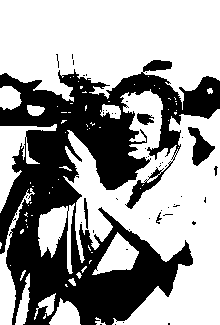

In [ ]:
binary_image = np.where(image_gray_array < 100, 0, 255).astype(np.uint8)
binary_image

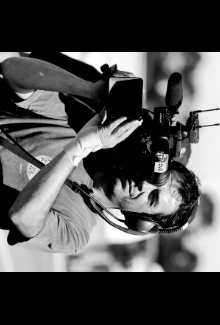

In [ ]:
rotate_image= image_gray.rotate(-90)
rotate_image

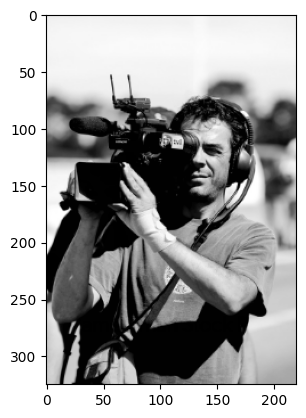

In [ ]:
image_rgb = image_gray.convert('RGB')
plt.imshow(image_rgb)

# Excercise 3


In [ ]:
print(image_gray_array.shape)
height, width = image_gray_array.shape
data = image_gray_array.copy()

(325, 220)


In [ ]:
mean = np.mean( data , axis =0)
centered_data = data - mean
centered_data = centered_data
centered_data.shape

(325, 220)

In [ ]:
cov_matrix = np.cov(centered_data, rowvar=False)
cov_matrix.shape

(220, 220)

In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

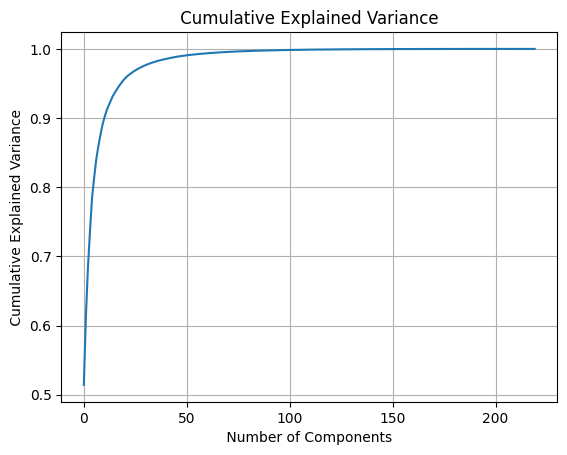

In [ ]:
explained_variance_ratio = eigenvalues / np .sum ( eigenvalues )
plt.plot ( np . cumsum ( explained_variance_ratio ) )
plt.title (" Cumulative Explained Variance ")
plt.xlabel (" Number of Components ")
plt.ylabel (" Cumulative Explained Variance ")
plt.grid ( True )
plt.show ()

In [ ]:
k = 40
components = eigenvectors [: , : k ]

In [ ]:
compressed_data = np . dot ( centered_data , components )
decompressed_data = np . dot ( compressed_data , components . T ) + mean

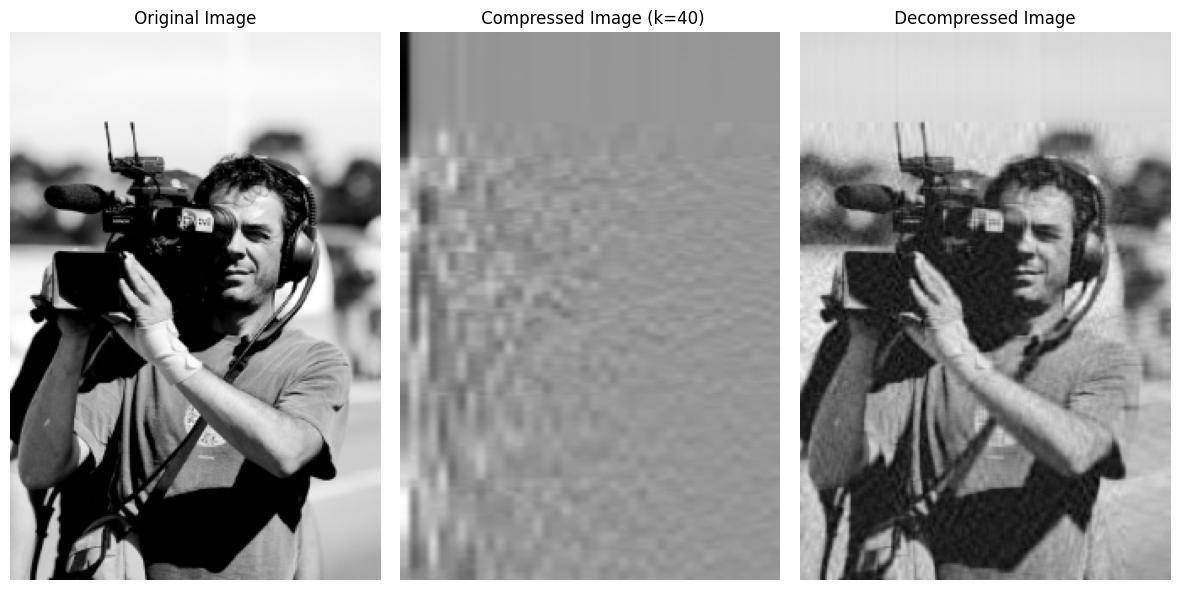

In [ ]:
plt . figure ( figsize =(12 , 6) )
plt.subplot (1 , 3 , 1)
plt.imshow ( image_gray_array , cmap ="gray")
plt.title (" Original Image ")
plt.axis ("off")
plt.subplot (1 , 3 , 2)
plt.imshow ( compressed_data , cmap ="gray", aspect ="auto")
plt.title ( f" Compressed Image (k={k})")
plt.axis ("off")
plt.subplot (1 , 3 , 3)
plt.imshow ( decompressed_data , cmap ="gray")
plt.title (" Decompressed Image ")
plt.axis ("off")
plt.tight_layout()
plt.show()